In [3]:
#import libraries
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

In [4]:
#import dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df = df.replace(["yes", "no"], [1, 0])
temp = Counter(np.array(df)[:,0]) 
i = -1
dictt = {}
for k, v in temp.items():
    i = i + 1
    dictt.update({k:i})
df = df.replace(dictt)

print(df.keys())
for i in range(len(df["phone number"])):
    temp = df.loc[i, "phone number"]
    df.loc[i, "phone number"] = temp.replace('-', '')
#extract target data
twoD_Y = df["churn"]
twoD_Y = np.array(np.int_(twoD_Y.replace(True, 1)))
#extract train data 1
twoD_X = np.array(df.drop(["churn", "state", "phone number","total day minutes","total day calls","total day charge"], axis = 1))

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


# 1.StratifiedKFold

In [5]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.2, random_state=42)
#Stratified K Fold
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)

In [6]:
#fine tuned 3rd iteration has least error
from sklearn import svm
#kernel = 'linear'
i = 0
clf_svm = svm.SVC(kernel='linear', gamma=1)
for train_index, test_index in skf.split(X_train, Y_train):
    i = i + 1
    if i == 3:
        clf_svm.fit(X_train[train_index], Y_train[train_index])
        Y_pred = clf_svm.predict(X_train[test_index])
        print("accuracy score: ", metrics.accuracy_score(Y_train[test_index], Y_pred))
        break

accuracy score:  0.8576779026217228


In [7]:
#fine tuned 9th iteration has least error
#Random forest classification model
#max depth = 20
from sklearn.ensemble import RandomForestClassifier
i = 0
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
for train_index, test_index in skf.split(X_train, Y_train):
    i = i + 1
    if i == 9:
        clf_RF.fit(X_train[train_index], Y_train[train_index])
        Y_pred = clf_RF.predict(X_train[test_index])
        print("accuracy score: ", metrics.accuracy_score(Y_train[test_index], Y_pred))
        break

accuracy score:  0.8909774436090225


/home/rish/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
#fine tuned 1st iteration has least error
#stocastic gradient descent
from sklearn.linear_model import SGDClassifier
i = 0
clf_SGD = SGDClassifier(loss="log", penalty="l2")
for train_index, test_index in skf.split(X_train, Y_train):
    i = i + 1
    if i == 1:
        clf_SGD.fit(X_train[train_index], Y_train[train_index])
        Y_pred = clf_SGD.predict(X_train[test_index])
        print(metrics.accuracy_score(Y_train[test_index], Y_pred))
        break

0.6119402985074627


/home/rish/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [9]:
#fine tuned 9th iteration has least error
#decision tree classifier
from sklearn import tree

clf_DT = tree.DecisionTreeClassifier()
i = 0
for train_index, test_index in skf.split(X_train, Y_train):
    i = i + 1
    if i == 9:
        clf_DT.fit(X_train[train_index], Y_train[train_index])
        Y_pred = clf_DT.predict(X_train[test_index])
        print(metrics.accuracy_score(Y_train[test_index], Y_pred))
        break

0.8609022556390977


In [10]:
#fine tuned 10th iteration has least error
#logistic regressor 2-class classifier
logreg = linear_model.LogisticRegression()
i = 0
for train_index, test_index in skf.split(X_train, Y_train):
    i = i + 1
    if i == 10:
        logreg.fit(X_train[train_index], Y_train[train_index])
        Y_pred = logreg.predict(X_train[test_index])
        print(metrics.accuracy_score(Y_train[test_index], Y_pred))
        break

0.8872180451127819


In [11]:
model_vs_err1 = {}
model_vs_err1.update({"LogisticRegression" : metrics.accuracy_score(Y_test, logreg.predict(X_test))})
model_vs_err1.update({"DecisionTreeClassifier" : metrics.accuracy_score(Y_test, clf_DT.predict(X_test))})
model_vs_err1.update({"SGD" : metrics.accuracy_score(Y_test, clf_SGD.predict(X_test))})
model_vs_err1.update({"RandomForestClassifier" : metrics.accuracy_score(Y_test, clf_RF.predict(X_test))})
model_vs_err1.update({"SupportVectorMachine" : metrics.accuracy_score(Y_test, clf_svm.predict(X_test))})
print(model_vs_err1)

{'LogisticRegression': 0.8575712143928036, 'DecisionTreeClassifier': 0.8350824587706147, 'SGD': 0.6116941529235382, 'RandomForestClassifier': 0.8650674662668666, 'SupportVectorMachine': 0.848575712143928}


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err1.keys()), y=list(model_vs_err1.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Models vs Accuracy Score')
plt.show()

<Figure size 640x480 with 1 Axes>

# 2.Holdout 

In [13]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.2, random_state=42)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [14]:
#fine tuned 3rd iteration has least error
from sklearn import svm
#kernel = 'linear'
clf_svm = svm.SVC(kernel='linear', gamma=1)
clf_svm.fit(X_train_c, Y_train_c)
Y_pred = clf_svm.predict(X_test_c)
print("accuracy score: ", metrics.accuracy_score(Y_test_c, Y_pred))

accuracy score:  0.8558052434456929


In [15]:
#fine tuned 9th iteration has least error
#Random forest classification model
#max depth = 20
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
clf_RF.fit(X_train_c, Y_train_c)
Y_pred = clf_RF.predict(X_test_c)
print("accuracy score: ", metrics.accuracy_score(Y_test_c, Y_pred))

accuracy score:  0.8876404494382022


In [16]:
#fine tuned 1st iteration has least error
#stocastic gradient descent
from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(loss="log", penalty="l2")
clf_SGD.fit(X_train_c, Y_train_c)
Y_pred = clf_SGD.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8408239700374532


/home/rish/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [17]:
#fine tuned 9th iteration has least error
#decision tree classifier
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(X_train_c, Y_train_c)
Y_pred = clf_DT.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8239700374531835


In [18]:
#fine tuned 10th iteration has least error
#logistic regressor 2-class classifier
logreg = linear_model.LogisticRegression()
logreg.fit(X_train_c, Y_train_c)
Y_pred = logreg.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8632958801498127


In [19]:
model_vs_err2 = {}
model_vs_err2.update({"LogisticRegression" : metrics.accuracy_score(Y_test, logreg.predict(X_test))})
model_vs_err2.update({"DecisionTreeClassifier" : metrics.accuracy_score(Y_test, clf_DT.predict(X_test))})
model_vs_err2.update({"SGD" : metrics.accuracy_score(Y_test, clf_SGD.predict(X_test))})
model_vs_err2.update({"RandomForestClassifier" : metrics.accuracy_score(Y_test, clf_RF.predict(X_test))})
model_vs_err2.update({"SupportVectorMachine" : metrics.accuracy_score(Y_test, clf_svm.predict(X_test))})
print(model_vs_err2)

{'LogisticRegression': 0.8575712143928036, 'DecisionTreeClassifier': 0.8215892053973014, 'SGD': 0.8455772113943029, 'RandomForestClassifier': 0.8755622188905547, 'SupportVectorMachine': 0.848575712143928}


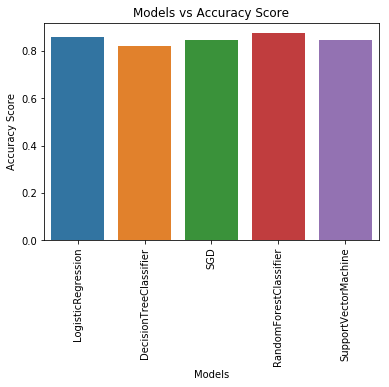

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err2.keys()), y=list(model_vs_err2.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Models vs Accuracy Score')
plt.show()

# 3.Stratified Holdout

In [21]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.2, random_state=42, stratify = twoD_Y)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [22]:
#fine tuned 3rd iteration has least error
from sklearn import svm
#kernel = 'linear'
clf_svm = svm.SVC(kernel='linear', gamma=1)
clf_svm.fit(X_train_c, Y_train_c)
Y_pred = clf_svm.predict(X_test_c)
print("accuracy score: ", metrics.accuracy_score(Y_test_c, Y_pred))

accuracy score:  0.8707865168539326


In [23]:
#fine tuned 9th iteration has least error
#Random forest classification model
#max depth = 20
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
clf_RF.fit(X_train_c, Y_train_c)
Y_pred = clf_RF.predict(X_test_c)
print("accuracy score: ", metrics.accuracy_score(Y_test_c, Y_pred))

accuracy score:  0.900749063670412


In [24]:
#fine tuned 1st iteration has least error
#stocastic gradient descent
from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(loss="log", penalty="l2")
clf_SGD.fit(X_train_c, Y_train_c)
Y_pred = clf_SGD.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8707865168539326


/home/rish/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [25]:
#fine tuned 9th iteration has least error
#decision tree classifier
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(X_train_c, Y_train_c)
Y_pred = clf_DT.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8520599250936329


In [26]:
#fine tuned 10th iteration has least error
#logistic regressor 2-class classifier
logreg = linear_model.LogisticRegression()
logreg.fit(X_train_c, Y_train_c)
Y_pred = logreg.predict(X_test_c)
print(metrics.accuracy_score(Y_test_c, Y_pred))

0.8801498127340824


In [27]:
model_vs_err3 = {}
model_vs_err3.update({"LogisticRegression" : metrics.accuracy_score(Y_test, logreg.predict(X_test))})
model_vs_err3.update({"DecisionTreeClassifier" : metrics.accuracy_score(Y_test, clf_DT.predict(X_test))})
model_vs_err3.update({"SGD" : metrics.accuracy_score(Y_test, clf_SGD.predict(X_test))})
model_vs_err3.update({"RandomForestClassifier" : metrics.accuracy_score(Y_test, clf_RF.predict(X_test))})
model_vs_err3.update({"SupportVectorMachine" : metrics.accuracy_score(Y_test, clf_svm.predict(X_test))})
print(model_vs_err3)

{'LogisticRegression': 0.8545727136431784, 'DecisionTreeClassifier': 0.8140929535232384, 'SGD': 0.8545727136431784, 'RandomForestClassifier': 0.8710644677661169, 'SupportVectorMachine': 0.856071964017991}


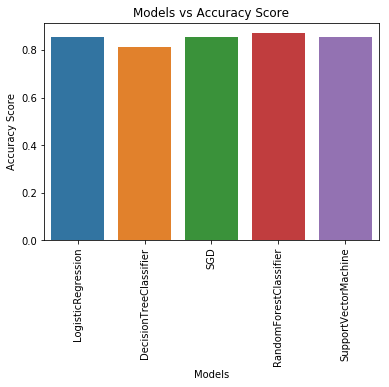

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err3.keys()), y=list(model_vs_err3.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Models vs Accuracy Score')
plt.show()

# Bootstrap

In [29]:
#split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(twoD_X, twoD_Y, test_size=0.33, random_state=42)

In [30]:
from sklearn.utils import resample
X_train_boot=[]
Y_train_boot=[]
for i in range (1,11):
    X_train_boot.append( resample(X_train,replace=True,random_state=i ))
    Y_train_boot.append(resample(Y_train,replace=True,random_state=i ))  

In [31]:
#fine tuned 3rd iteration has least error
from sklearn import svm
#kernel = 'linear'
clf_svm = svm.SVC(kernel='linear', gamma=1)
for i in range (0,10):
    clf_svm.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = clf_svm.predict(X_test)
    print("accuracy score: ", metrics.accuracy_score(Y_test, Y_pred))

accuracy score:  0.8563636363636363
accuracy score:  0.8563636363636363
accuracy score:  0.8563636363636363
accuracy score:  0.8554545454545455
accuracy score:  0.8545454545454545
accuracy score:  0.8554545454545455
accuracy score:  0.8563636363636363
accuracy score:  0.8554545454545455
accuracy score:  0.8554545454545455
accuracy score:  0.8645454545454545


In [32]:
#fine tuned 9th iteration has least error
#Random forest classification model
#max depth = 20
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=20, random_state=0)
for i in range (0,10):
    clf_RF.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = clf_RF.predict(X_test)
    print("accuracy score: ", metrics.accuracy_score(Y_test, Y_pred))
clf_RF.fit(X_train_boot[6], Y_train_boot[6])


accuracy score:  0.8836363636363637
accuracy score:  0.8709090909090909
accuracy score:  0.8827272727272727
accuracy score:  0.8827272727272727
accuracy score:  0.8836363636363637
accuracy score:  0.8845454545454545
accuracy score:  0.8772727272727273
accuracy score:  0.8863636363636364
accuracy score:  0.8909090909090909
accuracy score:  0.8790909090909091


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#fine tuned 1st iteration has least error
#stocastic gradient descent
from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(loss="log", penalty="l2")
for i in range (0,10):
    clf_SGD.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = clf_SGD.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_pred))
clf_SGD.fit(X_train_boot[3], Y_train_boot[3])


0.75
0.8545454545454545
0.8545454545454545
0.85
0.16
0.8409090909090909
0.8545454545454545
0.8545454545454545
0.8545454545454545
0.8545454545454545


/home/rish/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [34]:
#fine tuned 9th iteration has least error
#decision tree classifier
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()
for i in range (0,10):
    clf_DT.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = clf_DT.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_pred))
clf_DT.fit(X_train_boot[9], Y_train_boot[9])


0.8281818181818181
0.8154545454545454
0.8272727272727273
0.8263636363636364
0.8227272727272728
0.8090909090909091
0.8327272727272728
0.8036363636363636
0.8245454545454546
0.82


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
#fine tuned 10th iteration has least error
#logistic regressor 2-class classifier
logreg = linear_model.LogisticRegression()
for i in range (0,10):
    logreg.fit(X_train_boot[i], Y_train_boot[i])
    Y_pred = logreg.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_pred))
logreg.fit(X_train_boot[4], Y_train_boot[4])


0.8572727272727273
0.8618181818181818
0.8618181818181818
0.8590909090909091
0.8636363636363636
0.8654545454545455
0.8590909090909091
0.8627272727272727
0.86
0.8581818181818182


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
model_vs_err4 = {}
model_vs_err4.update({"LogisticRegression" : metrics.accuracy_score(Y_test, logreg.predict(X_test))})
model_vs_err4.update({"DecisionTreeClassifier" : metrics.accuracy_score(Y_test, clf_DT.predict(X_test))})
model_vs_err4.update({"SGD" : metrics.accuracy_score(Y_test, clf_SGD.predict(X_test))})
model_vs_err4.update({"RandomForestClassifier" : metrics.accuracy_score(Y_test, clf_RF.predict(X_test))})
model_vs_err4.update({"SupportVectorMachine" : metrics.accuracy_score(Y_test, clf_svm.predict(X_test))})
print(model_vs_err4)

{'LogisticRegression': 0.8636363636363636, 'DecisionTreeClassifier': 0.8227272727272728, 'SGD': 0.8545454545454545, 'RandomForestClassifier': 0.8772727272727273, 'SupportVectorMachine': 0.8645454545454545}


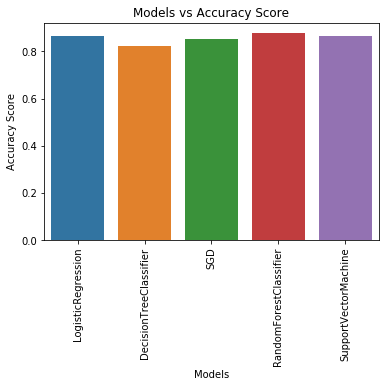

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(model_vs_err4.keys()), y=list(model_vs_err4.values()))
plt.xticks(rotation= 90)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Models vs Accuracy Score')
plt.show()

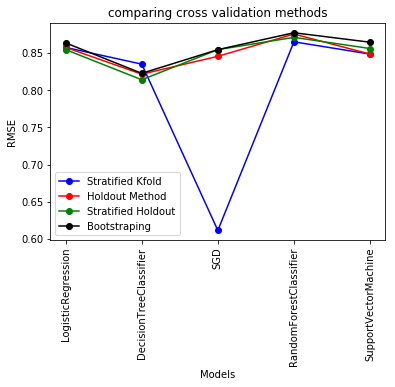

In [38]:
# plot
plt.plot( model_vs_err1.keys(), model_vs_err1.values(), marker='.', markersize=12, color='blue', label="Stratified Kfold")
plt.plot( model_vs_err2.keys(), model_vs_err2.values(), marker='.', markersize=12, color='red', label="Holdout Method")
plt.plot( model_vs_err3.keys(), model_vs_err3.values(), marker='.', markersize=12, color='green', label="Stratified Holdout")
plt.plot( model_vs_err4.keys(), model_vs_err4.values(), marker='.', markersize=12, color='black', label="Bootstraping")
plt.legend()
plt.xticks(rotation= 90)
plt.title('comparing cross validation methods')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()